In [1]:
# data processing packages
import numpy as np   
import pandas as pd 
from pandas import *
from numpy import *

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *
 
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import IPython
from IPython.display import display

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import itertools

import random

# local packages 
from utils_causal import *

import pickle

/home/guo/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
# TO DO
# 
# Kalman 
# structural bayeisan time series
# feature extration on time series


In [4]:
#  Plant  Dual

# -- Data -- 
pkl_file = "../../ts_results/pickle/plant_dual.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

att = data['attention']
rmse = data['rmse']

print rmse

print 'rmse', mean([i['rmse'] for i in rmse]), std([i['rmse'] for i in rmse])
print 'mae',  mean([i['mae'] for i in rmse]),  std([i['mae'] for i in rmse])

[{u'mape': inf, u'mae': 118.89532926550996, u'val_step loss': 23168.84392886817, u'rmse': 152.21315235979165}, {u'mape': inf, u'mae': 118.89532926550996, u'val_step loss': 23168.84392886817, u'rmse': 152.21315235979165}, {u'mape': inf, u'mae': 139.19336218108455, u'val_step loss': 25213.745848527513, u'rmse': 158.7883685567306}, {u'mape': inf, u'mae': 102.13550883452332, u'val_step loss': 26119.29254177437, u'rmse': 161.61463993628212}, {u'mape': inf, u'mae': 162.09156470249462, u'val_step loss': 31929.295201717134, u'rmse': 178.68770265742504}, {u'mape': inf, u'mae': 152.53454946001312, u'val_step loss': 37531.822112721566, u'rmse': 193.73131603099182}, {u'mape': inf, u'mae': 165.80182923092624, u'val_step loss': 39515.4072366599, u'rmse': 198.78482699516695}, {u'mape': inf, u'mae': 161.35612042158004, u'val_step loss': 39690.65605959195, u'rmse': 199.2251369642946}, {u'mape': inf, u'mae': 164.72220598753304, u'val_step loss': 39762.48210741322, u'rmse': 199.40532229042503}, {u'mape':

rmse 0.3550972100169377 0.002666043913794741
mae 0.24777184127553947 0.002857704487856903
[[4, 0.6981583], [5, 0.15599783], [3, 0.09633694], [1, 0.031105526]]
(2000,) 0.6981583
(2000,) 0.15599783
(2000,) 0.09633694
(2000,) 0.031105526


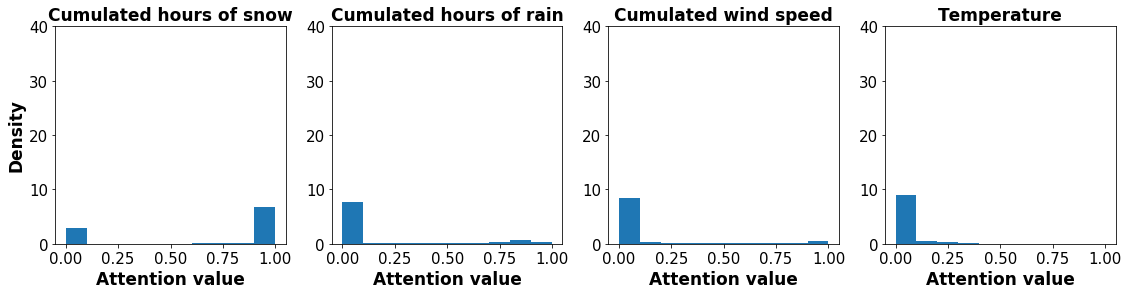

In [41]:
#  PM2.5  Dual

# -- Data -- 
pkl_file = "../../ts_results/pickle/pm25_dual.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

att = data['attention']
rmse = data['rmse']

print 'rmse', mean([i['rmse'] for i in rmse]), std([i['rmse'] for i in rmse])
print 'mae',  mean([i['mae'] for i in rmse]),  std([i['mae'] for i in rmse])

# ganger causal: 0,1,2
num_ex_vari = 7
vari_name = ['Dew Point', 'Temperature', 'Pressure', 'Cumulated wind speed', \
             'Cumulated hours of snow','Cumulated hours of rain']


# #  --- rank variables according to attention ---
# np.shape(att)
# att = np.transpose(att,[1,0])

# att_mean =[]
# for i in range(num_ex_vari-1):
#     tmp = att[i]
#     att_mean.append([i, mean(tmp)])

# sort_att_mean = sorted(att_mean, key = lambda x:x[1], reverse= True)
# print sort_att_mean[:4]



rmse 0.3711821328239959 0.005928918496652915
mae 0.24878121366912032 0.005741588148647269
[[9, 0.13146618], [5, 0.12250754], [11, 0.110023275], [1, 0.109782405]]
(2000,) 0.13146618
(2000,) 0.12250754
(2000,) 0.110023275
(2000,) 0.109782405


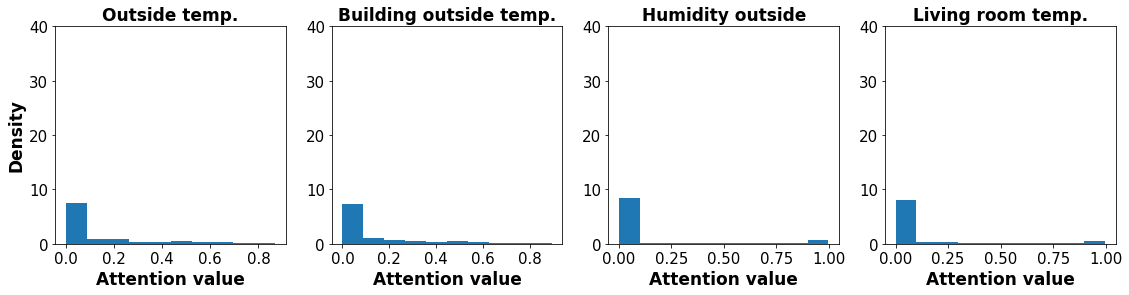

In [40]:
# ENERGY Dual
pkl_file = "../../ts_results/pickle/energy_dual.pickle"
pkl_file = open(pkl_file, 'rb')

data = pickle.load(pkl_file)
att = data['attention']
rmse = data['rmse']

print 'rmse', mean([i['rmse'] for i in rmse]), std([i['rmse'] for i in rmse])
print 'mae',  mean([i['mae'] for i in rmse]),  std([i['mae'] for i in rmse])


#  --- rank variables according to attention ---
np.shape(att)
att = np.transpose(att,[1,0])

att_mean =[]
for i in range(num_ex_vari-1):
    tmp = att[i]
    att_mean.append([i, mean(tmp)])

sort_att_mean = sorted(att_mean, key = lambda x:x[1], reverse= True)
print sort_att_mean[:4]


# ganger causal: 1,8
num_ex_vari = 13
vari_name = ['Kitchen temp.', 'Living room temp.', 'Laundry room temp.', 'Office room temp.',\
             'Bathroom temp.','Building outside temp.', 'Ironing room temp.', 'Teenager room temp.',\
             'Parents room temp.', 'Outside temp.', 'Wind speed', 'Humidity outside', 'Dew point'  ]


In [4]:
#  PM2.5  RETAIN

# -- Data -- 
pkl_file = "../../ts_results/pickle/pm25_retain.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

rmse = data['rmse']
print 'rmse', mean([i['rmse'] for i in rmse]), std([i['rmse'] for i in rmse])
print 'mae',  mean([i['mae'] for i in rmse]),  std([i['mae'] for i in rmse])


rmse 1.111472080874119 0.017999750454308145
mae 0.9427874133069872 0.018337017939015755


In [5]:
#  ENERGY  RETAIN

# -- Data -- 
pkl_file = "../../ts_results/pickle/energy_retain.pickle"
pkl_file = open(pkl_file, 'rb')
data = pickle.load(pkl_file)

rmse = data['rmse']
print 'rmse', mean([i['rmse'] for i in rmse]), std([i['rmse'] for i in rmse])
print 'mae',  mean([i['mae'] for i in rmse]),  std([i['mae'] for i in rmse])


rmse 0.6687385245825427 0.006220413289078888
mae 0.5068904892213677 0.01556708122159307


In [6]:
# MV-LSTM parameters for prediction error analysis

file_dic_ml = {}
    
file_addr = ["../../dataset/dataset_ts/air_xtrain.dat", \
                 "../../dataset/dataset_ts/air_xtest.dat",\
                 "../../dataset/dataset_ts/air_ytrain.dat", \
                 "../../dataset/dataset_ts/air_ytest.dat"]
file_dic_ml.update( {"air": file_addr} )
    
file_addr = ["../../dataset/dataset_ts/energy_xtrain.dat", \
                 "../../dataset/dataset_ts/energy_xtest.dat",\
                 "../../dataset/dataset_ts/energy_ytrain.dat", \
                 "../../dataset/dataset_ts/energy_ytest.dat"]
file_dic_ml.update( {"energy": file_addr} )
    
file_addr = ["../../dataset/dataset_ts/pm25_xtrain.dat", \
                 "../../dataset/dataset_ts/pm25_xtest.dat",\
                 "../../dataset/dataset_ts/pm25_ytrain.dat", \
                 "../../dataset/dataset_ts/pm25_ytest.dat"]
file_dic_ml.update( {"pm25": file_addr} )



file_dic_statis = {}
    
file_addr = ["../../dataset/dataset_ts/air_xtrain_statis.dat", \
                 "../../dataset/dataset_ts/air_xtest_statis.dat"]
file_dic_statis.update( {"air": file_addr} )
    
file_addr = ["../../dataset/dataset_ts/energy_xtrain_statis.dat", \
                 "../../dataset/dataset_ts/energy_xtest_statis.dat"]
file_dic_statis.update( {"energy": file_addr} )
    
file_addr = ["../../dataset/dataset_ts/pm25_xtrain_statis.dat", \
                 "../../dataset/dataset_ts/pm25_xtest_statis.dat"]
file_dic_statis.update( {"pm25": file_addr} )

file_addr = ["../../dataset/dataset_ts/plant_xtrain_statis.dat", \
                 "../../dataset/dataset_ts/plant_xtest_statis.dat"]
file_dic_statis.update( {"plant": file_addr} )

In [9]:
# PLANT : MV-LSTM errors 

file_path = "../../ts_results/plant_plain_att_0.60.001.txt"

dta_df = pd.read_csv( file_path, sep=',', names = ['loss', 'tr', 'ts', 'mae', 'mape'], header = 0 )
print dta_df.iloc[0]

rmse_ts = [float(tmp[6:]) for tmp in dta_df['ts'] ]
print rmse_ts[:2] 

mae_ts = [float(tmp) for tmp in dta_df['mae'] ]
print mae_ts[:2] 

sort_rmse_ts = sorted(rmse_ts)
print 'RMSE ', sort_rmse_ts[:2], mean(sort_rmse_ts[:10]), std(sort_rmse_ts[:10])

sort_mae_ts = sorted(mae_ts)
print 'MAE ', sort_mae_ts[:2], mean(sort_mae_ts[:10]), std(sort_mae_ts[:10])

loss    At epoch 1: loss 38863.144435
tr                   train 196.833695
ts                    test 159.488495
mae                           141.349
mape                       7.1749e+06
Name: 0, dtype: object
[159.488495, 152.327499]
[141.34896899999998, 117.10686499999998]
RMSE  [152.327499, 157.701767] 157.7971283 1.8608411702419476
MAE  [105.877357, 106.490059] 107.1954132 0.6364179280954905


In [33]:
# ENERGY : MV-LSTM errors 

file_path = "../../ts_results/energy_mv_att_0.60.001.txt"

dta_df = pd.read_csv( file_path, sep=',', names = ['loss', 'tr', 'ts', 'mae', 'mape'], header = 0 )
print dta_df.iloc[0], 'shape: '
print dta_df.shape

rmse_ts = [float(tmp[6:]) for tmp in dta_df['ts'] ]
print np.shape(rmse_ts)

mae_ts = [float(tmp) for tmp in dta_df['mae'] ]
print mae_ts[:2] 

sort_rmse_ts = sorted(rmse_ts)
print 'rmse: ', mean(sort_rmse_ts[:10]), std(sort_rmse_ts[:10])

sort_mae_ts = sorted(mae_ts)
print 'mae: ', mean(sort_mae_ts[:10]), std(sort_mae_ts[:10])

loss    At epoch 1: loss 0.209599
tr                 train 0.453499
ts                  test 0.412334
mae                      0.296545
mape                     0.069455
Name: 0, dtype: object shape: 
(99, 5)
(99,)
[0.296545, 0.25613400000000003]
rmse:  0.3769485 0.0057286152995291995
mae:  0.2565407 0.0060501189583346176


In [28]:
# PM25 : MV-LSTM errors 

file_path = "../../ts_results/pm_mv_0.60.001.txt"

dta_df = pd.read_csv( file_path, sep=',', names = ['loss', 'tr', 'ts', 'mae', 'mape'], header = 0 )
print dta_df.iloc[0]

rmse_ts = [float(tmp[6:]) for tmp in dta_df['ts'] ]
print rmse_ts[:2] 

mae_ts = [float(tmp) for tmp in dta_df['mae'] ]
print mae_ts[:2] 

sort_rmse_ts = sorted(rmse_ts)
print 'rmse: ', mean(sort_rmse_ts[:10]), std(sort_rmse_ts[:10])

sort_mae_ts = sorted(mae_ts)
print 'mae: ', mean(sort_mae_ts[:10]), std(sort_mae_ts[:10])

loss    At epoch 1: loss 0.133646
tr                 train 0.362250
ts                  test 0.425036
mae                       0.31097
mape                     0.099776
Name: 0, dtype: object
[0.425036, 0.432375]
[0.31096999999999997, 0.314021]
rmse:  0.3403378 0.0011357487222092694
mae:  0.22783000000000003 0.002073396199475633
